In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import math

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.

In [3]:
korean = pd.read_csv("02-1_내국인유동인구_KOREAN.csv", encoding='cp949')

In [4]:
korean

,base_date,time,city,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,제주시,50110250,한림읍,여성,0,638.5509,15.5400,151.5149,제주
1,2018-01-01,1,제주시,50110250,한림읍,여성,0,0.0000,3.7249,171.3458,그외
2,2018-01-01,1,제주시,50110250,한림읍,여성,10,668.4577,17.0308,166.0500,제주
3,2018-01-01,1,제주시,50110250,한림읍,여성,10,0.0000,4.2577,195.8539,그외
4,2018-01-01,1,제주시,50110250,한림읍,여성,20,609.7710,5.9490,148.7246,제주
...,...,...,...,...,...,...,...,...,...,...,...
47250191,2021-06-30,24,서귀포시,50130620,예래동,남성,20,0.0000,0.0000,599.1969,그외
47250192,2021-06-30,24,서귀포시,50130620,예래동,남성,20,187.5990,41.9998,75.5996,제주
47250193,2021-06-30,24,서귀포시,50130620,예래동,남성,10,121.8467,0.0000,4.5128,제주
47250194,2021-06-30,24,서귀포시,50130620,예래동,남성,80,122.2190,0.0000,4.5032,제주


In [5]:
korean['base_date'] = pd.to_datetime(korean['base_date'])

In [6]:
korean_1 = korean.groupby(['base_date', 'emd_nm', 'age'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].sum().reset_index()

<ipython-input-6-f46a3337fb80>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  korean_1 = korean.groupby(['base_date', 'emd_nm', 'age'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].sum().reset_index()


In [7]:
korean_1

,base_date,emd_nm,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018-01-01,건입동,0,16351.2905,713.8630,16214.6272
1,2018-01-01,건입동,10,18486.9641,814.5841,18564.0649
2,2018-01-01,건입동,20,15567.3243,3324.0660,24819.1271
3,2018-01-01,건입동,30,21464.1979,3076.2479,24662.7518
4,2018-01-01,건입동,40,28162.6876,4193.0287,33514.8307
...,...,...,...,...,...,...
494194,2021-06-30,효돈동,40,13048.2698,1201.3172,6634.0157
494195,2021-06-30,효돈동,50,15587.7237,1371.6294,7738.4695
494196,2021-06-30,효돈동,60,13604.6820,695.3218,5568.2805
494197,2021-06-30,효돈동,70,9921.4180,176.8777,2737.0372


In [8]:
korean1 = pd.get_dummies(korean_1, columns = ['age'])

In [9]:
korean1

,base_date,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,age_0,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80
0,2018-01-01,건입동,16351.2905,713.8630,16214.6272,1,0,0,0,0,0,0,0,0
1,2018-01-01,건입동,18486.9641,814.5841,18564.0649,0,1,0,0,0,0,0,0,0
2,2018-01-01,건입동,15567.3243,3324.0660,24819.1271,0,0,1,0,0,0,0,0,0
3,2018-01-01,건입동,21464.1979,3076.2479,24662.7518,0,0,0,1,0,0,0,0,0
4,2018-01-01,건입동,28162.6876,4193.0287,33514.8307,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494194,2021-06-30,효돈동,13048.2698,1201.3172,6634.0157,0,0,0,0,1,0,0,0,0
494195,2021-06-30,효돈동,15587.7237,1371.6294,7738.4695,0,0,0,0,0,1,0,0,0
494196,2021-06-30,효돈동,13604.6820,695.3218,5568.2805,0,0,0,0,0,0,1,0,0
494197,2021-06-30,효돈동,9921.4180,176.8777,2737.0372,0,0,0,0,0,0,0,1,0


In [10]:
korean1['0_resd'] = korean1['age_0'] * korean1['resd_pop_cnt']
korean1['10_resd'] = korean1['age_10'] * korean1['resd_pop_cnt']
korean1['20_resd'] = korean1['age_20'] * korean1['resd_pop_cnt']
korean1['30_resd'] = korean1['age_30'] * korean1['resd_pop_cnt']
korean1['40_resd'] = korean1['age_40'] * korean1['resd_pop_cnt']
korean1['50_resd'] = korean1['age_50'] * korean1['resd_pop_cnt']
korean1['60_resd'] = korean1['age_60'] * korean1['resd_pop_cnt']
korean1['70_resd'] = korean1['age_70'] * korean1['resd_pop_cnt']
korean1['80_resd'] = korean1['age_80'] * korean1['resd_pop_cnt']

korean1['0_work'] = korean1['age_0'] * korean1['work_pop_cnt']
korean1['10_work'] = korean1['age_10'] * korean1['work_pop_cnt']
korean1['20_work'] = korean1['age_20'] * korean1['work_pop_cnt']
korean1['30_work'] = korean1['age_30'] * korean1['work_pop_cnt']
korean1['40_work'] = korean1['age_40'] * korean1['work_pop_cnt']
korean1['50_work'] = korean1['age_50'] * korean1['work_pop_cnt']
korean1['60_work'] = korean1['age_60'] * korean1['work_pop_cnt']
korean1['70_work'] = korean1['age_70'] * korean1['work_pop_cnt']
korean1['80_work'] = korean1['age_80'] * korean1['work_pop_cnt']

korean1['0_visit'] = korean1['age_0'] * korean1['visit_pop_cnt']
korean1['10_visit'] = korean1['age_10'] * korean1['visit_pop_cnt']
korean1['20_visit'] = korean1['age_20'] * korean1['visit_pop_cnt']
korean1['30_visit'] = korean1['age_30'] * korean1['visit_pop_cnt']
korean1['40_visit'] = korean1['age_40'] * korean1['visit_pop_cnt']
korean1['50_visit'] = korean1['age_50'] * korean1['visit_pop_cnt']
korean1['60_visit'] = korean1['age_60'] * korean1['visit_pop_cnt']
korean1['70_visit'] = korean1['age_70'] * korean1['visit_pop_cnt']
korean1['80_visit'] = korean1['age_80'] * korean1['visit_pop_cnt']

In [11]:
korean1['resd'] = korean1['0_resd'] + korean1['10_resd'] + korean1['20_resd'] + korean1['30_resd'] + korean1['40_resd'] + korean1['50_resd'] + korean1['60_resd'] + korean1['70_resd'] + korean1['80_resd'] + korean1['0_work'] + korean1['10_work'] + korean1['20_work'] + korean1['30_work'] + korean1['40_work'] + korean1['50_work'] + korean1['60_work'] + korean1['70_work'] + korean1['80_work'] + korean1['0_visit'] + korean1['10_visit'] + korean1['20_visit'] + korean1['30_visit'] + korean1['40_visit'] + korean1['50_visit'] + korean1['60_visit'] + korean1['70_visit'] + korean1['80_visit']

In [12]:
korean1 = korean1.drop(['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt', 'age_0', 'age_10', 'age_20', 'age_30', 'age_40', 'age_50', 'age_60', 'age_70', 'age_80', '0_resd', '10_resd', '20_resd', '30_resd', '40_resd', '50_resd', '60_resd', '70_resd', '80_resd', '0_work', '10_work', '20_work', '30_work', '40_work', '50_work', '60_work', '70_work', '80_work', '0_visit', '10_visit', '20_visit', '30_visit', '40_visit', '50_visit', '60_visit', '70_visit', '80_visit'], axis = 1)

In [13]:
korean1

,base_date,emd_nm,resd
0,2018-01-01,건입동,33279.7807
1,2018-01-01,건입동,37865.6131
2,2018-01-01,건입동,43710.5174
3,2018-01-01,건입동,49203.1976
4,2018-01-01,건입동,65870.5470
...,...,...,...
494194,2021-06-30,효돈동,20883.6027
494195,2021-06-30,효돈동,24697.8226
494196,2021-06-30,효돈동,19868.2843
494197,2021-06-30,효돈동,12835.3329


In [14]:
korean2 = korean1.groupby(['base_date', 'emd_nm']).sum().reset_index()

In [15]:
korean2

,base_date,emd_nm,resd
0,2018-01-01,건입동,3.710493e+05
1,2018-01-01,구좌읍,5.283621e+05
2,2018-01-01,남원읍,5.160217e+05
3,2018-01-01,노형동,1.667941e+06
4,2018-01-01,대륜동,4.933991e+05
...,...,...,...
54906,2021-06-30,표선면,4.208569e+05
54907,2021-06-30,한경면,2.820137e+05
54908,2021-06-30,한림읍,8.066293e+05
54909,2021-06-30,화북동,8.637016e+05


In [16]:
longterm_frgn = pd.read_csv("02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.csv", encoding='cp949')

In [17]:
longterm_frgn

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주
...,...,...,...,...,...,...,...,...,...,...
23837312,2021-06-30,24,THA,서귀포시,50130620,예래동,0.0000,0.0000,3.3558,제주
23837313,2021-06-30,24,TWN,서귀포시,50130620,예래동,0.0000,0.0000,12.2655,그외
23837314,2021-06-30,24,USA,서귀포시,50130620,예래동,22.0624,0.0000,0.0000,제주
23837315,2021-06-30,24,USA,서귀포시,50130620,예래동,0.0000,0.0000,26.4749,그외


In [18]:
longterm_frgn['base_date'] = pd.to_datetime(longterm_frgn['base_date'])

In [19]:
longtermfrgn = longterm_frgn.groupby(['base_date', 'emd_nm', 'nationality'])['resd_pop_cnt'].sum().reset_index()

In [20]:
longtermfrgn

,base_date,emd_nm,nationality,resd_pop_cnt
0,2018-01-01,건입동,CAN,0.0000
1,2018-01-01,건입동,CHN,1061.2064
2,2018-01-01,건입동,ETC,3.9559
3,2018-01-01,건입동,IDN,1205.5205
4,2018-01-01,건입동,JPN,500.3513
...,...,...,...,...
1077542,2021-06-30,효돈동,RUS,0.0000
1077543,2021-06-30,효돈동,THA,0.0000
1077544,2021-06-30,효돈동,USA,0.0000
1077545,2021-06-30,효돈동,UZB,0.0000


In [21]:
longtermfrgn1 = pd.get_dummies(longtermfrgn, columns = ['nationality'])

In [22]:
longtermfrgn1['AUS_cnt'] = longtermfrgn1['nationality_AUS'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['BGD_cnt'] = longtermfrgn1['nationality_BGD'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['CAN_cnt'] = longtermfrgn1['nationality_CAN'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['CHN_cnt'] = longtermfrgn1['nationality_CHN'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['DEU_cnt'] = longtermfrgn1['nationality_DEU'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['ETC_cnt'] = longtermfrgn1['nationality_ETC'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['FRA_cnt'] = longtermfrgn1['nationality_FRA'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['GBR_cnt'] = longtermfrgn1['nationality_GBR'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['IDN_cnt'] = longtermfrgn1['nationality_IDN'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['IND_cnt'] = longtermfrgn1['nationality_IND'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['JPN_cnt'] = longtermfrgn1['nationality_JPN'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['KAZ_cnt'] = longtermfrgn1['nationality_KAZ'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['KGZ_cnt'] = longtermfrgn1['nationality_KGZ'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['KHM_cnt'] = longtermfrgn1['nationality_KHM'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['LKA_cnt'] = longtermfrgn1['nationality_LKA'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['MGL_cnt'] = longtermfrgn1['nationality_MGL'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['MMR_cnt'] = longtermfrgn1['nationality_MMR'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['MYS_cnt'] = longtermfrgn1['nationality_MYS'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['NPL_cnt'] = longtermfrgn1['nationality_NPL'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['NZL_cnt'] = longtermfrgn1['nationality_NZL'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['PAK_cnt'] = longtermfrgn1['nationality_PAK'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['PHL_cnt'] = longtermfrgn1['nationality_PHL'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['RUS_cnt'] = longtermfrgn1['nationality_RUS'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['THA_cnt'] = longtermfrgn1['nationality_THA'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['TWN_cnt'] = longtermfrgn1['nationality_TWN'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['UKR_cnt'] = longtermfrgn1['nationality_UKR'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['USA_cnt'] = longtermfrgn1['nationality_USA'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['UZB_cnt'] = longtermfrgn1['nationality_UZB'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['VNM_cnt'] = longtermfrgn1['nationality_VNM'] * longtermfrgn1['resd_pop_cnt']

In [23]:
longtermfrgn1['ETC_resd_pop_cnt'] = longtermfrgn1['TWN_cnt'] + longtermfrgn1['VNM_cnt'] + longtermfrgn1['AUS_cnt'] + longtermfrgn1['CAN_cnt'] + longtermfrgn1['CHN_cnt'] + longtermfrgn1['ETC_cnt'] + longtermfrgn1['GBR_cnt'] + longtermfrgn1['IDN_cnt'] + longtermfrgn1['IND_cnt'] + longtermfrgn1['MGL_cnt'] + longtermfrgn1['MYS_cnt'] +  longtermfrgn1['NZL_cnt'] +  longtermfrgn1['PAK_cnt'] + longtermfrgn1['RUS_cnt'] + longtermfrgn1['THA_cnt'] + longtermfrgn1['USA_cnt']

In [24]:
longtermfrgn1 = longtermfrgn1[['base_date', 'emd_nm', 'FRA_cnt', 'MMR_cnt', 'NPL_cnt', 'UKR_cnt', 'JPN_cnt', 'ETC_resd_pop_cnt']]

In [25]:
longtermfrgn1

,base_date,emd_nm,FRA_cnt,MMR_cnt,NPL_cnt,UKR_cnt,JPN_cnt,ETC_resd_pop_cnt
0,2018-01-01,건입동,0.0,0.0,0.0,0.0,0.0000,0.0000
1,2018-01-01,건입동,0.0,0.0,0.0,0.0,0.0000,1061.2064
2,2018-01-01,건입동,0.0,0.0,0.0,0.0,0.0000,3.9559
3,2018-01-01,건입동,0.0,0.0,0.0,0.0,0.0000,1205.5205
4,2018-01-01,건입동,0.0,0.0,0.0,0.0,500.3513,0.0000
...,...,...,...,...,...,...,...,...
1077542,2021-06-30,효돈동,0.0,0.0,0.0,0.0,0.0000,0.0000
1077543,2021-06-30,효돈동,0.0,0.0,0.0,0.0,0.0000,0.0000
1077544,2021-06-30,효돈동,0.0,0.0,0.0,0.0,0.0000,0.0000
1077545,2021-06-30,효돈동,0.0,0.0,0.0,0.0,0.0000,0.0000


In [26]:
longtermfrgn2 = longtermfrgn1.groupby(['base_date', 'emd_nm']).sum().reset_index()

In [27]:
longtermfrgn2

,base_date,emd_nm,FRA_cnt,MMR_cnt,NPL_cnt,UKR_cnt,JPN_cnt,ETC_resd_pop_cnt
0,2018-01-01,건입동,0.0000,0.0000,216.9030,0.0,500.3513,3177.3688
1,2018-01-01,구좌읍,0.0000,29.6784,960.4211,0.0,107.3181,3867.1207
2,2018-01-01,남원읍,0.0000,122.1746,771.4046,0.0,0.0000,2885.3072
3,2018-01-01,노형동,33.5742,64.9682,346.6340,0.0,443.9517,42312.1420
4,2018-01-01,대륜동,0.0000,0.0000,0.0000,0.0,115.7638,2564.3937
...,...,...,...,...,...,...,...,...
54906,2021-06-30,표선면,0.0000,62.6232,278.5915,0.0,0.0000,2691.8820
54907,2021-06-30,한경면,0.0000,28.7023,343.7938,0.0,41.9920,5240.3614
54908,2021-06-30,한림읍,29.9808,506.2138,1541.1455,0.0,0.0000,19989.9166
54909,2021-06-30,화북동,19.9872,148.7322,320.0844,0.0,503.9001,3853.0653


In [28]:
shortterm_frgn = pd.read_csv("02-3_단기체류 외국인 유동인구_SHORT_TERM_FRGN.csv", encoding='cp949')

In [29]:
shortterm_frgn

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66.3170
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21.1308
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3.6771
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5.5962
4,2018-01-01,1,USA,제주시,50110250,한림읍,3.9078
...,...,...,...,...,...,...,...
6059039,2021-06-30,24,USA,서귀포시,50130610,중문동,9.2120
6059040,2021-06-30,24,CHN,서귀포시,50130610,중문동,0.6039
6059041,2021-06-30,24,ETC,서귀포시,50130610,중문동,11.5473
6059042,2021-06-30,24,CHN,서귀포시,50130620,예래동,0.2013


In [30]:
shortterm_frgn['base_date'] = pd.to_datetime(shortterm_frgn['base_date'])

In [31]:
shorttermfrgn = shortterm_frgn.groupby(['base_date', 'emd_nm', 'nationality'])['visit_pop_cnt'].sum().reset_index()

In [32]:
shorttermfrgn

,base_date,emd_nm,nationality,visit_pop_cnt
0,2018-01-01,건입동,CHN,1424.3743
1,2018-01-01,건입동,ETC,258.8518
2,2018-01-01,건입동,HKG,264.7481
3,2018-01-01,건입동,IDN,483.0000
4,2018-01-01,건입동,JPN,509.2529
...,...,...,...,...
344658,2021-06-30,한림읍,USA,21.1876
344659,2021-06-30,화북동,CHN,1.4091
344660,2021-06-30,화북동,HKG,0.0332
344661,2021-06-30,화북동,USA,42.3752


In [33]:
shorttermfrgn1 = pd.get_dummies(shorttermfrgn, columns = ['nationality'])

In [34]:
shorttermfrgn1['CHN_visit_pop_cnt'] = shorttermfrgn1['nationality_CHN'] * shorttermfrgn1['visit_pop_cnt']
shorttermfrgn1['ETC_visit_pop_cnt'] = shorttermfrgn1['nationality_ETC'] * shorttermfrgn1['visit_pop_cnt']
shorttermfrgn1['HKG_visit_pop_cnt'] = shorttermfrgn1['nationality_HKG'] * shorttermfrgn1['visit_pop_cnt']
shorttermfrgn1['IDN_visit_pop_cnt'] = shorttermfrgn1['nationality_IDN'] * shorttermfrgn1['visit_pop_cnt']
shorttermfrgn1['JPN_visit_pop_cnt'] = shorttermfrgn1['nationality_JPN'] * shorttermfrgn1['visit_pop_cnt']
shorttermfrgn1['MYS_visit_pop_cnt'] = shorttermfrgn1['nationality_MYS'] * shorttermfrgn1['visit_pop_cnt']
shorttermfrgn1['SGP_visit_pop_cnt'] = shorttermfrgn1['nationality_SGP'] * shorttermfrgn1['visit_pop_cnt']
shorttermfrgn1['THA_visit_pop_cnt'] = shorttermfrgn1['nationality_THA'] * shorttermfrgn1['visit_pop_cnt']
shorttermfrgn1['USA_visit_pop_cnt'] = shorttermfrgn1['nationality_USA'] * shorttermfrgn1['visit_pop_cnt']
shorttermfrgn1['VNM_visit_pop_cnt'] = shorttermfrgn1['nationality_VNM'] * shorttermfrgn1['visit_pop_cnt']

In [35]:
shorttermfrgn1['ETC_visit_pop_cnt']=shorttermfrgn1['CHN_visit_pop_cnt'] + shorttermfrgn1['ETC_visit_pop_cnt'] + shorttermfrgn1['HKG_visit_pop_cnt'] + shorttermfrgn1['IDN_visit_pop_cnt'] + shorttermfrgn1['JPN_visit_pop_cnt'] + shorttermfrgn1['MYS_visit_pop_cnt'] + shorttermfrgn1['SGP_visit_pop_cnt'] + shorttermfrgn1['VNM_visit_pop_cnt']

In [36]:
shorttermfrgn1 = shorttermfrgn1[['base_date', 'emd_nm', 'ETC_visit_pop_cnt', 'USA_visit_pop_cnt']]

In [37]:
shorttermfrgn1

,base_date,emd_nm,ETC_visit_pop_cnt,USA_visit_pop_cnt
0,2018-01-01,건입동,1424.3743,0.0000
1,2018-01-01,건입동,258.8518,0.0000
2,2018-01-01,건입동,264.7481,0.0000
3,2018-01-01,건입동,483.0000,0.0000
4,2018-01-01,건입동,509.2529,0.0000
...,...,...,...,...
344658,2021-06-30,한림읍,0.0000,21.1876
344659,2021-06-30,화북동,1.4091,0.0000
344660,2021-06-30,화북동,0.0332,0.0000
344661,2021-06-30,화북동,0.0000,42.3752


In [38]:
shorttermfrgn2 = shorttermfrgn1.groupby(['base_date', 'emd_nm']).sum().reset_index()

In [39]:
shorttermfrgn2

,base_date,emd_nm,ETC_visit_pop_cnt,USA_visit_pop_cnt
0,2018-01-01,건입동,4751.7521,1.9539
1,2018-01-01,구좌읍,1487.6542,46.8936
2,2018-01-01,남원읍,3466.3551,85.9717
3,2018-01-01,노형동,9503.5558,80.1103
4,2018-01-01,대륜동,1341.1864,5.8617
...,...,...,...,...
53711,2021-06-30,표선면,86.6566,2.7636
53712,2021-06-30,한경면,6.9285,5.5272
53713,2021-06-30,한림읍,51.5825,21.1876
53714,2021-06-30,화북동,1.4423,42.3752


In [40]:
merge = pd.merge(longtermfrgn2, shorttermfrgn2, how = 'inner')

In [41]:
merge = pd.merge(merge, korean2, how = 'inner')

In [42]:
merge

,base_date,emd_nm,FRA_cnt,MMR_cnt,NPL_cnt,UKR_cnt,JPN_cnt,ETC_resd_pop_cnt,ETC_visit_pop_cnt,USA_visit_pop_cnt,resd
0,2018-01-01,건입동,0.0000,0.0000,216.9030,0.0,500.3513,3177.3688,4751.7521,1.9539,3.710493e+05
1,2018-01-01,구좌읍,0.0000,29.6784,960.4211,0.0,107.3181,3867.1207,1487.6542,46.8936,5.283621e+05
2,2018-01-01,남원읍,0.0000,122.1746,771.4046,0.0,0.0000,2885.3072,3466.3551,85.9717,5.160217e+05
3,2018-01-01,노형동,33.5742,64.9682,346.6340,0.0,443.9517,42312.1420,9503.5558,80.1103,1.667941e+06
4,2018-01-01,대륜동,0.0000,0.0000,0.0000,0.0,115.7638,2564.3937,1341.1864,5.8617,4.933991e+05
...,...,...,...,...,...,...,...,...,...,...,...
53711,2021-06-30,표선면,0.0000,62.6232,278.5915,0.0,0.0000,2691.8820,86.6566,2.7636,4.208569e+05
53712,2021-06-30,한경면,0.0000,28.7023,343.7938,0.0,41.9920,5240.3614,6.9285,5.5272,2.820137e+05
53713,2021-06-30,한림읍,29.9808,506.2138,1541.1455,0.0,0.0000,19989.9166,51.5825,21.1876,8.066293e+05
53714,2021-06-30,화북동,19.9872,148.7322,320.0844,0.0,503.9001,3853.0653,1.4423,42.3752,8.637016e+05


In [43]:
merge['resd'] = merge['JPN_cnt'] + merge['ETC_resd_pop_cnt'] + merge['resd']

In [44]:
merge2 = merge.drop(['JPN_cnt', 'ETC_resd_pop_cnt'], axis = 1)

In [45]:
merge2

,base_date,emd_nm,FRA_cnt,MMR_cnt,NPL_cnt,UKR_cnt,ETC_visit_pop_cnt,USA_visit_pop_cnt,resd
0,2018-01-01,건입동,0.0000,0.0000,216.9030,0.0,4751.7521,1.9539,3.747270e+05
1,2018-01-01,구좌읍,0.0000,29.6784,960.4211,0.0,1487.6542,46.8936,5.323365e+05
2,2018-01-01,남원읍,0.0000,122.1746,771.4046,0.0,3466.3551,85.9717,5.189070e+05
3,2018-01-01,노형동,33.5742,64.9682,346.6340,0.0,9503.5558,80.1103,1.710697e+06
4,2018-01-01,대륜동,0.0000,0.0000,0.0000,0.0,1341.1864,5.8617,4.960792e+05
...,...,...,...,...,...,...,...,...,...
53711,2021-06-30,표선면,0.0000,62.6232,278.5915,0.0,86.6566,2.7636,4.235488e+05
53712,2021-06-30,한경면,0.0000,28.7023,343.7938,0.0,6.9285,5.5272,2.872961e+05
53713,2021-06-30,한림읍,29.9808,506.2138,1541.1455,0.0,51.5825,21.1876,8.266192e+05
53714,2021-06-30,화북동,19.9872,148.7322,320.0844,0.0,1.4423,42.3752,8.680586e+05


In [46]:
train = merge2[merge2['base_date'] <= '2020-12-31']

In [47]:
test = merge2[merge2['base_date'] > '2020-12-31']

In [48]:
한림읍_train = train[train['emd_nm']=='한림읍']
애월읍_train = train[train['emd_nm']=='애월읍']
구좌읍_train = train[train['emd_nm']=='구좌읍']
조천읍_train = train[train['emd_nm']=='조천읍']
한경면_train = train[train['emd_nm']=='한경면']
일도1동_train = train[train['emd_nm']=='일도1동']
일도2동_train = train[train['emd_nm']=='일도2동']
이도1동_train = train[train['emd_nm']=='이도1동']
이도2동_train = train[train['emd_nm']=='이도2동']
삼도1동_train = train[train['emd_nm']=='삼도1동']
삼도2동_train = train[train['emd_nm']=='삼도2동']
용담1동_train = train[train['emd_nm']=='용담1동']
용담2동_train = train[train['emd_nm']=='용담2동']
건입동_train = train[train['emd_nm']=='건입동']
화북동_train = train[train['emd_nm']=='화북동']
삼양동_train = train[train['emd_nm']=='삼양동']
봉개동_train = train[train['emd_nm']=='봉개동']
아라동_train = train[train['emd_nm']=='아라동']
오라동_train = train[train['emd_nm']=='오라동']
연동_train = train[train['emd_nm']=='연동']
노형동_train = train[train['emd_nm']=='노형동']
외도동_train = train[train['emd_nm']=='외도동']
이호동_train = train[train['emd_nm']=='이호동']
도두동_train = train[train['emd_nm']=='도두동']
대정읍_train = train[train['emd_nm']=='대정읍']
남원읍_train = train[train['emd_nm']=='남원읍']
성산읍_train = train[train['emd_nm']=='성산읍']
안덕면_train = train[train['emd_nm']=='안덕면']
표선면_train = train[train['emd_nm']=='표선면']
송산동_train = train[train['emd_nm']=='송산동']
정방동_train = train[train['emd_nm']=='정방동']
중앙동_train = train[train['emd_nm']=='중앙동']
천지동_train = train[train['emd_nm']=='천지동']
효돈동_train = train[train['emd_nm']=='효돈동']
영천동_train = train[train['emd_nm']=='영천동']
동홍동_train = train[train['emd_nm']=='동홍동']
서홍동_train = train[train['emd_nm']=='서홍동']
대륜동_train = train[train['emd_nm']=='대륜동']
대천동_train = train[train['emd_nm']=='대천동']
중문동_train = train[train['emd_nm']=='중문동']
예래동_train = train[train['emd_nm']=='예래동']
알수없음_train = train[train['emd_nm']=='알수없음']

In [49]:
한림읍_test = test[test['emd_nm']=='한림읍']
애월읍_test = test[test['emd_nm']=='애월읍']
구좌읍_test = test[test['emd_nm']=='구좌읍']
조천읍_test = test[test['emd_nm']=='조천읍']
한경면_test = test[test['emd_nm']=='한경면']
일도1동_test = test[test['emd_nm']=='일도1동']
일도2동_test = test[test['emd_nm']=='일도2동']
이도1동_test = test[test['emd_nm']=='이도1동']
이도2동_test = test[test['emd_nm']=='이도2동']
삼도1동_test = test[test['emd_nm']=='삼도1동']
삼도2동_test = test[test['emd_nm']=='삼도2동']
용담1동_test = test[test['emd_nm']=='용담1동']
용담2동_test = test[test['emd_nm']=='용담2동']
건입동_test = test[test['emd_nm']=='건입동']
화북동_test = test[test['emd_nm']=='화북동']
삼양동_test = test[test['emd_nm']=='삼양동']
봉개동_test = test[test['emd_nm']=='봉개동']
아라동_test = test[test['emd_nm']=='아라동']
오라동_test = test[test['emd_nm']=='오라동']
연동_test = test[test['emd_nm']=='연동']
노형동_test = test[test['emd_nm']=='노형동']
외도동_test = test[test['emd_nm']=='외도동']
이호동_test = test[test['emd_nm']=='이호동']
도두동_test = test[test['emd_nm']=='도두동']
대정읍_test = test[test['emd_nm']=='대정읍']
남원읍_test = test[test['emd_nm']=='남원읍']
성산읍_test = test[test['emd_nm']=='성산읍']
안덕면_test = test[test['emd_nm']=='안덕면']
표선면_test = test[test['emd_nm']=='표선면']
송산동_test = test[test['emd_nm']=='송산동']
정방동_test = test[test['emd_nm']=='정방동']
중앙동_test = test[test['emd_nm']=='중앙동']
천지동_test = test[test['emd_nm']=='천지동']
효돈동_test = test[test['emd_nm']=='효돈동']
영천동_test = test[test['emd_nm']=='영천동']
동홍동_test = test[test['emd_nm']=='동홍동']
서홍동_test = test[test['emd_nm']=='서홍동']
대륜동_test = test[test['emd_nm']=='대륜동']
대천동_test = test[test['emd_nm']=='대천동']
중문동_test = test[test['emd_nm']=='중문동']
예래동_test = test[test['emd_nm']=='예래동']
알수없음_test = test[test['emd_nm']=='알수없음']

In [50]:
train_한림읍_inf = 한림읍_train.iloc[:, 2:].values
test_한림읍_inf = 한림읍_test.iloc[:, 2:].values

train_애월읍_inf = 애월읍_train.iloc[:, 2:].values
test_애월읍_inf = 애월읍_test.iloc[:, 2:].values

train_구좌읍_inf = 구좌읍_train.iloc[:, 2:].values
test_구좌읍_inf = 구좌읍_test.iloc[:, 2:].values

train_조천읍_inf = 조천읍_train.iloc[:, 2:].values
test_조천읍_inf = 조천읍_test.iloc[:, 2:].values

train_한경면_inf = 한경면_train.iloc[:, 2:].values
test_한경면_inf = 한경면_test.iloc[:, 2:].values

train_일도1동_inf = 일도1동_train.iloc[:, 2:].values
test_일도1동_inf = 일도1동_test.iloc[:, 2:].values

train_일도2동_inf = 일도2동_train.iloc[:, 2:].values
test_일도2동_inf = 일도2동_test.iloc[:, 2:].values

train_이도1동_inf = 이도1동_train.iloc[:, 2:].values
test_이도1동_inf = 이도1동_test.iloc[:, 2:].values

train_이도2동_inf = 이도2동_train.iloc[:, 2:].values
test_이도2동_inf = 이도2동_test.iloc[:, 2:].values

train_삼도1동_inf = 삼도1동_train.iloc[:, 2:].values
test_삼도1동_inf = 삼도1동_test.iloc[:, 2:].values

train_삼도2동_inf = 삼도2동_train.iloc[:, 2:].values
test_삼도2동_inf = 삼도2동_test.iloc[:, 2:].values

train_용담1동_inf = 용담1동_train.iloc[:, 2:].values
test_용담1동_inf = 용담1동_test.iloc[:, 2:].values

train_용담2동_inf = 용담2동_train.iloc[:, 2:].values
test_용담2동_inf = 용담2동_test.iloc[:, 2:].values

train_건입동_inf = 건입동_train.iloc[:, 2:].values
test_건입동_inf = 건입동_test.iloc[:, 2:].values

train_화북동_inf = 화북동_train.iloc[:, 2:].values
test_화북동_inf = 화북동_test.iloc[:, 2:].values

train_삼양동_inf = 삼양동_train.iloc[:, 2:].values
test_삼양동_inf = 삼양동_test.iloc[:, 2:].values

train_봉개동_inf = 봉개동_train.iloc[:, 2:].values
test_봉개동_inf = 봉개동_test.iloc[:, 2:].values

train_아라동_inf = 아라동_train.iloc[:, 2:].values
test_아라동_inf = 아라동_test.iloc[:, 2:].values

train_오라동_inf = 오라동_train.iloc[:, 2:].values
test_오라동_inf = 오라동_test.iloc[:, 2:].values

train_연동_inf = 연동_train.iloc[:, 2:].values
test_연동_inf = 연동_test.iloc[:, 2:].values

train_노형동_inf = 노형동_train.iloc[:, 2:].values
test_노형동_inf = 노형동_test.iloc[:, 2:].values

train_외도동_inf = 외도동_train.iloc[:, 2:].values
test_외도동_inf = 외도동_test.iloc[:, 2:].values

train_이호동_inf = 이호동_train.iloc[:, 2:].values
test_이호동_inf = 이호동_test.iloc[:, 2:].values

train_도두동_inf = 도두동_train.iloc[:, 2:].values
test_도두동_inf = 도두동_test.iloc[:, 2:].values

train_대정읍_inf = 대정읍_train.iloc[:, 2:].values
test_대정읍_inf = 대정읍_test.iloc[:, 2:].values

train_남원읍_inf = 남원읍_train.iloc[:, 2:].values
test_남원읍_inf = 남원읍_test.iloc[:, 2:].values

train_성산읍_inf = 성산읍_train.iloc[:, 2:].values
test_성산읍_inf = 성산읍_test.iloc[:, 2:].values

train_안덕면_inf = 안덕면_train.iloc[:, 2:].values
test_안덕면_inf = 안덕면_test.iloc[:, 2:].values

train_표선면_inf = 표선면_train.iloc[:, 2:].values
test_표선면_inf = 표선면_test.iloc[:, 2:].values

train_송산동_inf = 송산동_train.iloc[:, 2:].values
test_송산동_inf = 송산동_test.iloc[:, 2:].values

train_정방동_inf = 정방동_train.iloc[:, 2:].values
test_정방동_inf = 정방동_test.iloc[:, 2:].values

train_중앙동_inf = 중앙동_train.iloc[:, 2:].values
test_중앙동_inf = 중앙동_test.iloc[:, 2:].values

train_천지동_inf = 천지동_train.iloc[:, 2:].values
test_천지동_inf = 천지동_test.iloc[:, 2:].values

train_효돈동_inf = 효돈동_train.iloc[:, 2:].values
test_효돈동_inf = 효돈동_test.iloc[:, 2:].values

train_영천동_inf = 영천동_train.iloc[:, 2:].values
test_영천동_inf = 영천동_test.iloc[:, 2:].values

train_동홍동_inf = 동홍동_train.iloc[:, 2:].values
test_동홍동_inf = 동홍동_test.iloc[:, 2:].values

train_서홍동_inf = 서홍동_train.iloc[:, 2:].values
test_서홍동_inf = 서홍동_test.iloc[:, 2:].values

train_대륜동_inf = 대륜동_train.iloc[:, 2:].values
test_대륜동_inf = 대륜동_test.iloc[:, 2:].values

train_대천동_inf = 대천동_train.iloc[:, 2:].values
test_대천동_inf = 대천동_test.iloc[:, 2:].values

train_중문동_inf = 중문동_train.iloc[:, 2:].values
test_중문동_inf = 중문동_test.iloc[:, 2:].values

train_예래동_inf = 예래동_train.iloc[:, 2:].values
test_예래동_inf = 예래동_test.iloc[:, 2:].values

train_알수없음_inf = 알수없음_train.iloc[:, 2:].values
test_알수없음_inf = 알수없음_test.iloc[:, 2:].values

In [51]:
한림읍_train

,base_date,emd_nm,FRA_cnt,MMR_cnt,NPL_cnt,UKR_cnt,ETC_visit_pop_cnt,USA_visit_pop_cnt,resd
40,2018-01-01,한림읍,0.0000,35.6302,2112.4613,0.0,2146.9338,29.3085,654077.7250
83,2018-01-02,한림읍,0.0000,206.2922,1835.3075,0.0,1803.0437,13.6773,657970.7297
126,2018-01-03,한림읍,0.0000,189.2177,2301.3732,0.0,1900.5158,3.9078,675378.6385
169,2018-01-04,한림읍,0.0000,87.6342,2184.9044,0.0,1190.1574,5.8617,685543.6580
212,2018-01-05,한림읍,0.0000,100.2011,2278.8237,0.0,1167.0322,0.0000,670204.2308
...,...,...,...,...,...,...,...,...,...
46345,2020-12-27,한림읍,86.6304,377.5410,1720.2358,0.0,40.0077,0.0000,699424.7881
46386,2020-12-28,한림읍,86.6304,307.1520,1748.0712,0.0,45.1795,0.0000,714999.6053
46426,2020-12-29,한림읍,86.6304,374.3415,1761.9886,0.0,35.8468,3.9075,744748.8948
46466,2020-12-30,한림읍,86.6304,383.9400,1664.5649,0.0,32.1746,0.0000,736681.4289


In [52]:
한림읍_test

,base_date,emd_nm,FRA_cnt,MMR_cnt,NPL_cnt,UKR_cnt,ETC_visit_pop_cnt,USA_visit_pop_cnt,resd
46548,2021-01-01,한림읍,82.9776,363.1992,2282.9820,0.0,11.4409,3.6210,737665.9677
46586,2021-01-02,한림읍,82.9776,348.0656,2296.3328,0.0,8.4138,15.6910,710824.6895
46626,2021-01-03,한림읍,82.9776,363.1992,2252.9427,0.0,11.7118,15.0875,688063.3663
46666,2021-01-04,한림읍,76.0628,359.4158,2226.2411,0.0,9.8299,14.4840,688187.9010
46705,2021-01-05,한림읍,82.9776,363.1992,2319.6967,0.0,23.7894,15.6910,708238.9465
...,...,...,...,...,...,...,...,...,...
53553,2021-06-26,한림읍,76.6176,587.1035,1375.1756,0.0,34.3069,0.9212,830202.5617
53593,2021-06-27,한림읍,79.9488,607.9782,1330.7198,0.0,36.5075,0.0000,817744.1755
53631,2021-06-28,한림읍,76.6176,602.7595,1555.9637,0.0,48.3068,9.2120,839198.5600
53670,2021-06-29,한림읍,69.9552,568.8378,1523.3626,0.0,39.4341,25.7936,847476.9789


In [53]:
train_한림읍_inf.shape

(1096, 7)

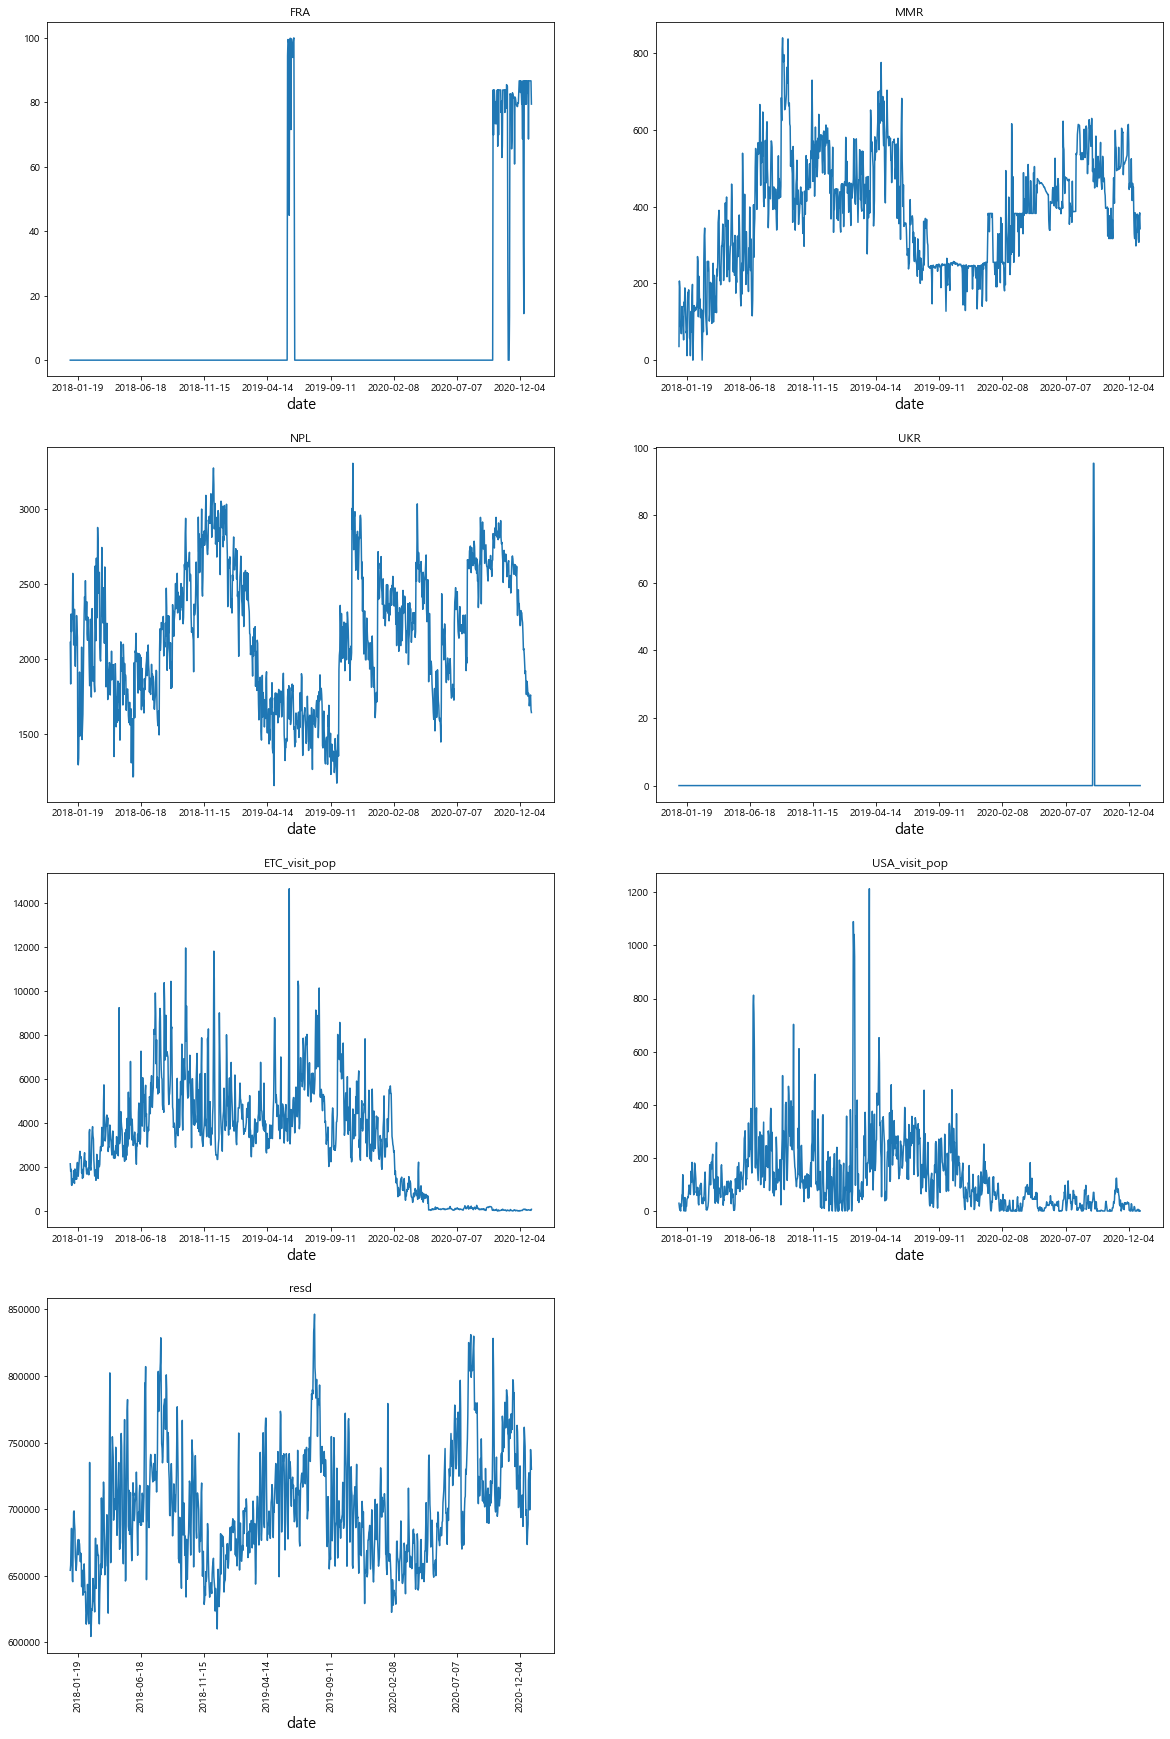

In [54]:
fig = plt.figure(figsize=(20,30))
ax1 = fig.add_subplot(4, 2, 1)
ax1.plot(한림읍_train['base_date'],한림읍_train['FRA_cnt'])
ax1.set_xlabel('date', fontsize = 15)
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('FRA')
ax2 = fig.add_subplot(4, 2, 2)
ax2.plot(한림읍_train['base_date'],한림읍_train['MMR_cnt'])
ax2.set_xlabel('date', fontsize = 15)
ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('MMR')
ax3 = fig.add_subplot(4, 2, 3)
ax3.plot(한림읍_train['base_date'],한림읍_train['NPL_cnt'])
ax3.set_xlabel('date', fontsize = 15)
ax3.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('NPL')
ax4 = fig.add_subplot(4, 2, 4)
ax4.plot(한림읍_train['base_date'],한림읍_train['UKR_cnt'])
ax4.set_xlabel('date', fontsize = 15)
ax4.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('UKR')
ax5 = fig.add_subplot(4, 2, 5)
ax5.plot(한림읍_train['base_date'],한림읍_train['ETC_visit_pop_cnt'])
ax5.set_xlabel('date', fontsize = 15)
ax5.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('ETC_visit_pop')
ax6 = fig.add_subplot(4, 2, 6)
ax6.plot(한림읍_train['base_date'],한림읍_train['USA_visit_pop_cnt'])
ax6.set_xlabel('date', fontsize = 15)
ax6.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('USA_visit_pop')
ax7 = fig.add_subplot(4, 2, 7)
ax7.plot(한림읍_train['base_date'],한림읍_train['resd'])
ax7.set_xlabel('date', fontsize = 15)
ax7.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('resd')

plt.xticks(rotation='vertical')
plt.show()